In [41]:
import pickle
import numpy as np

In [ ]:
pipe = pickle.load(open('/content/pipe.pkl','rb'))

In [ ]:
test01 = np.array([3,	'male',	22.0,	7.2500,	'S'],dtype=object).reshape(1,5)

In [ ]:
pipe.predict(test01)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([0])

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [6]:
df = pd.read_csv('/content/Titanic-Dataset.csv', usecols = ['Age','Fare','Survived'])

In [11]:
df.shape

(891, 3)

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
x = df.iloc[: ,1:3]
y = df.iloc[: ,0]

In [13]:
x.head(),y.head()

(    Age     Fare
 0  22.0   7.2500
 1  38.0  71.2833
 2  26.0   7.9250
 3  35.0  53.1000
 4  35.0   8.0500,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

Text(0.5, 1.0, 'Age QQ plot ')

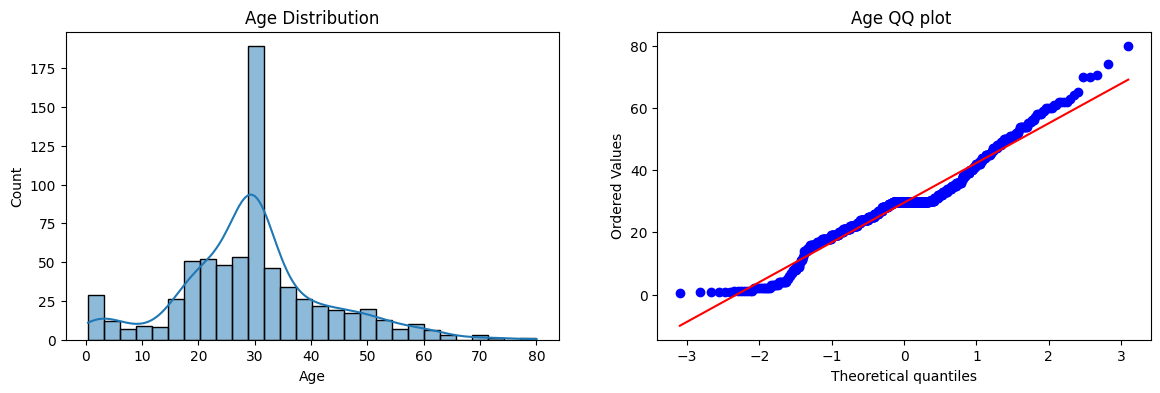

In [32]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.histplot(x_train['Age'], kde = True )
plt.title('Age Distribution')

plt.subplot(122)
stats.probplot(x_train['Age'], dist = 'norm' , plot=plt)
plt.title('Age QQ plot ')



Text(0.5, 1.0, 'Fare QQ plot ')

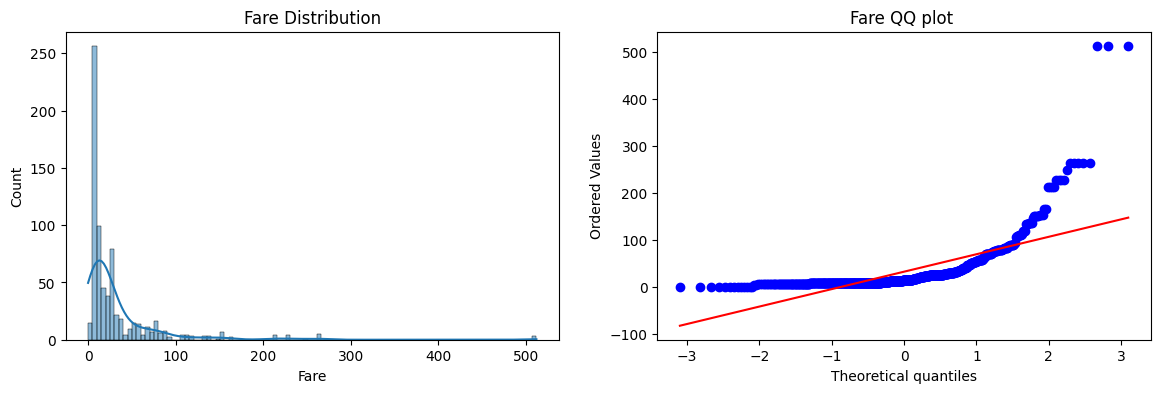

In [33]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.histplot(x_train['Fare'], kde = True )
plt.title('Fare Distribution')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist = 'norm' , plot=plt)
plt.title('Fare QQ plot ')



In [34]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [39]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)

acc1 = accuracy_score(y_test,y_pred1)
acc2 = accuracy_score(y_test,y_pred2)
print("LR",acc1 ,"DT",acc2)


LR 0.6480446927374302 DT 0.664804469273743


In [42]:
trf = FunctionTransformer(func = np.log1p)

In [43]:
x_train_trans = trf.fit_transform(x_train)
x_test_trans = trf.transform(x_test)

In [45]:
clf1.fit(x_train_trans,y_train)
clf2.fit(x_train_trans,y_train)

y_pred1 = clf1.predict(x_test_trans)
y_pred2 = clf2.predict(x_test_trans)

acc1 = accuracy_score(y_test,y_pred1)
acc2 = accuracy_score(y_test,y_pred2)
print("LR",acc1 ,"DT",acc2)

LR 0.6815642458100558 DT 0.6927374301675978


Power transformer

In [55]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression

In [56]:
df = pd.read_csv('/content/concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [57]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [58]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [53]:
x.head(),y.head()

(   cement   slag    ash  water  superplastic  coarseagg  fineagg  age
 0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28
 1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14
 2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28
 3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28
 4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28,
 0    29.89
 1    23.51
 2    29.22
 3    45.85
 4    18.29
 Name: strength, dtype: float64)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [60]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.6081118525118778

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
rf = RandomForestRegressor()

In [67]:
rf?


In [61]:
cross_val_score(lr,x,y,cv = 5, scoring = 'r2').mean()

np.float64(0.6012883381757209)

In [62]:
cross_val_score(lr,x,y,cv = 5, scoring = 'r2')

array([0.60623239, 0.64695454, 0.61555076, 0.61208575, 0.52561826])

In [66]:
cross_val_score(rf,x,y,cv=5,scoring='r2')

array([0.88339603, 0.92407852, 0.89228682, 0.92665532, 0.91539535])

plotting all the graphs

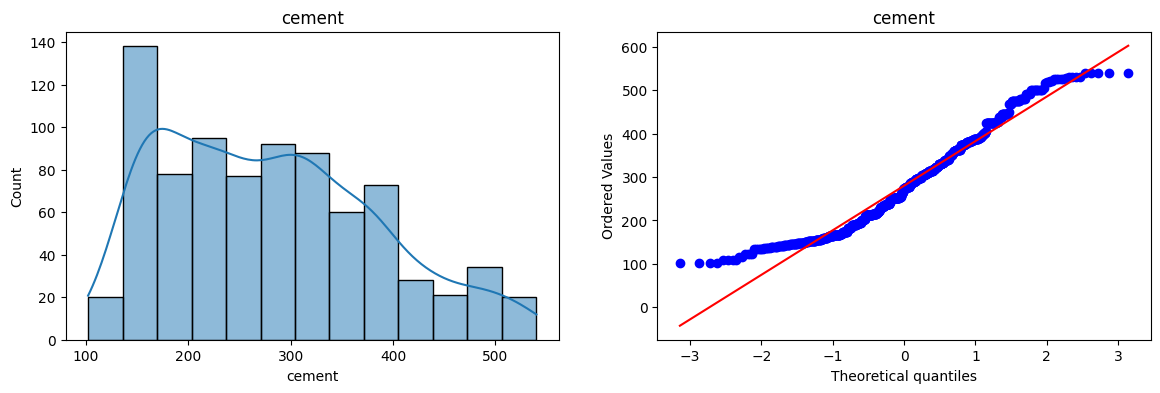

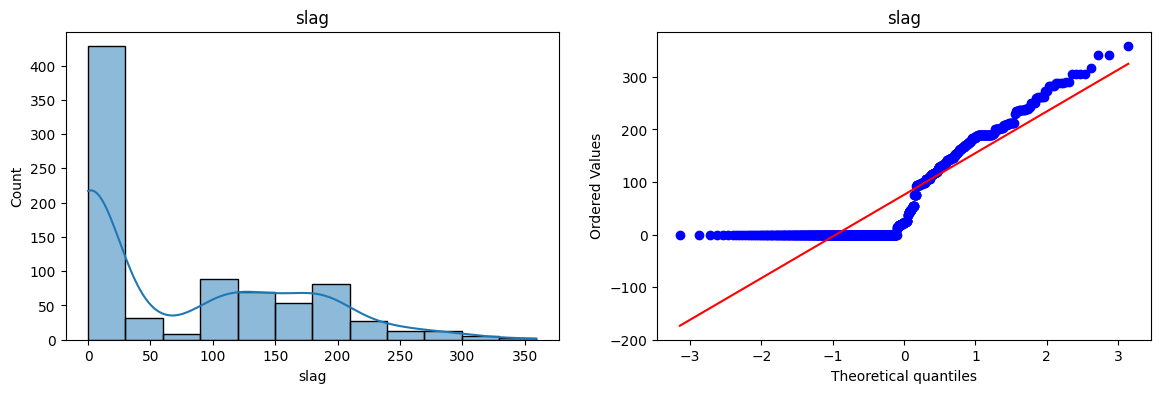

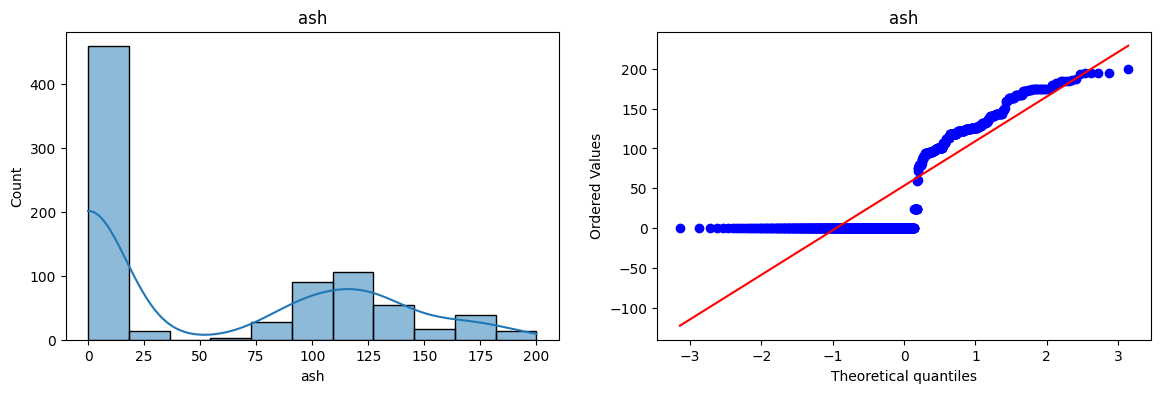

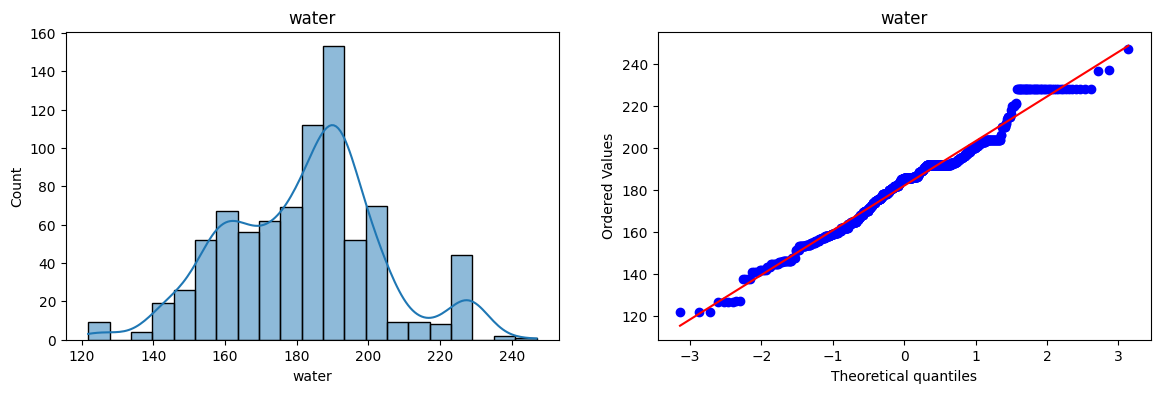

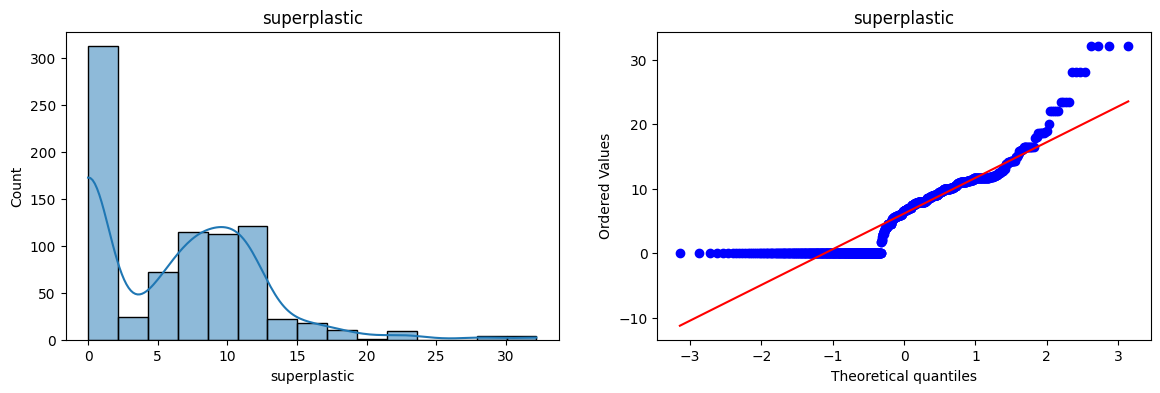

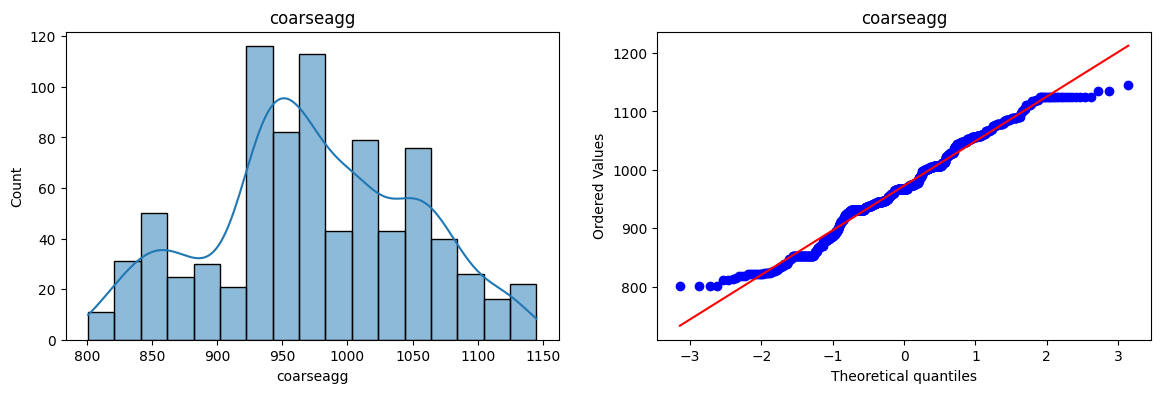

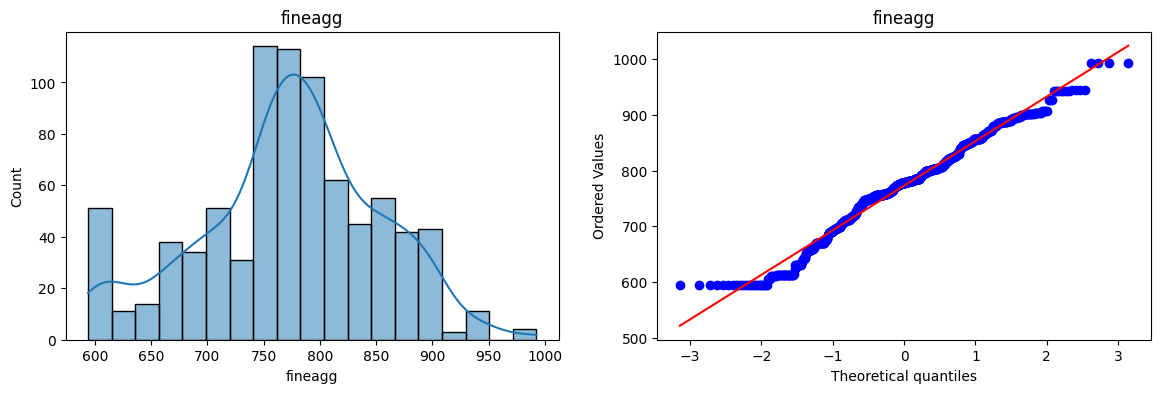

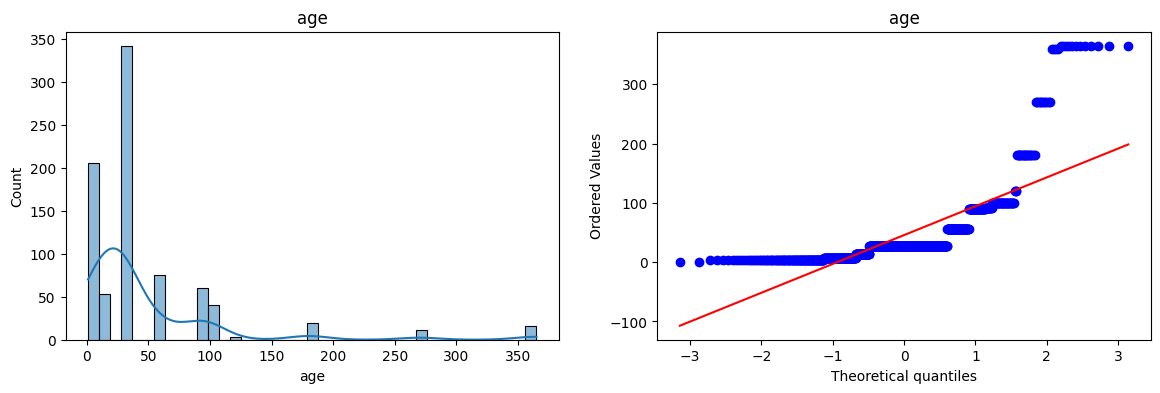

In [70]:
for col in x_train.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  sns.histplot(x_train[col], kde = True )
  plt.title(col)

  plt.subplot(122)
  stats.probplot(x_train[col], dist = 'norm', plot=plt)
  plt.title(col)
  plt.show()

In [75]:
#applying Box-Cox Transform

pt = PowerTransformer(method = 'box-cox')
x_train_trans = pt.fit_transform(x_train+0.000001)
x_test_trans = pt.transform(x_test+0.000001)

pd.DataFrame({'cols':x_train.columns, 'Box-Cox_lamda':pt.lambdas_})

,cols,Box-Cox_lamda
0,cement,0.177515
1,slag,0.024448
2,ash,-0.037392
3,water,0.853675
4,superplastic,0.095116
5,coarseagg,1.229404
6,fineagg,1.724776
7,age,0.050641


In [76]:
lr = LinearRegression()
cross_val_score(lr,x_train_trans,y_train,cv = 5, scoring = 'r2').mean()

np.float64(0.7977264587571706)

In [77]:
cross_val_score(rf,x_train_trans,y_train,cv = 5, scoring = 'r2').mean()

np.float64(0.896723060106277)

In [78]:
x_train_trans = pd.DataFrame(x_train_trans, columns = x_train.columns)

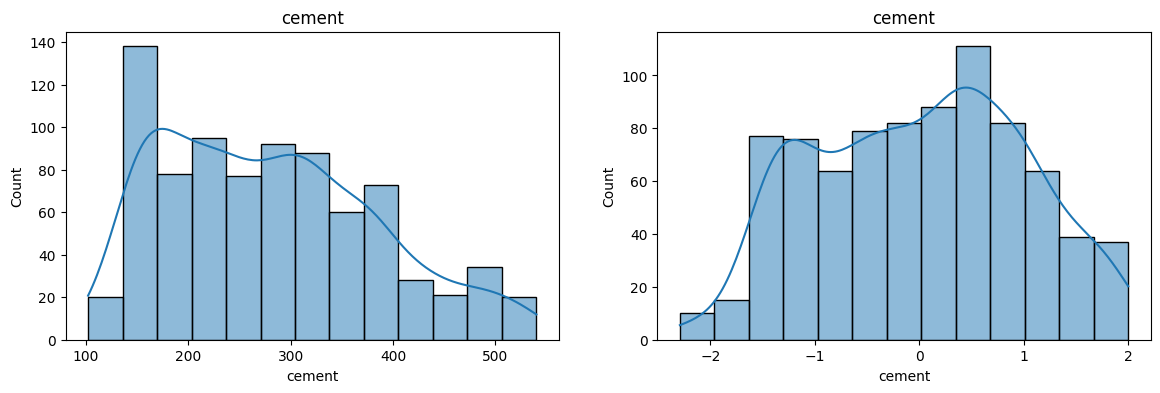

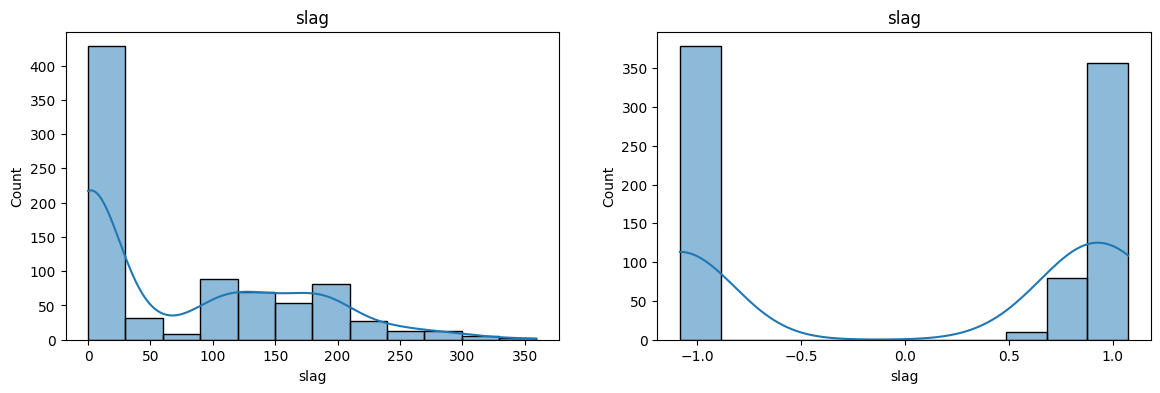

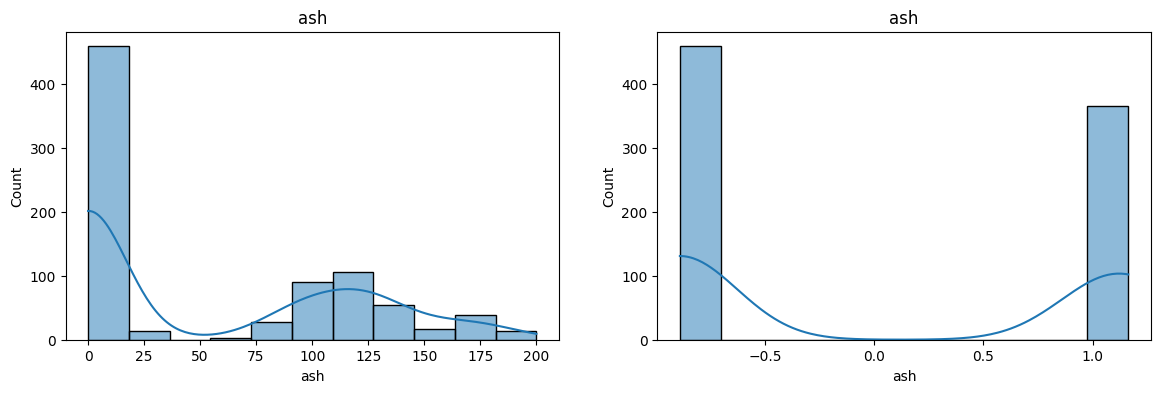

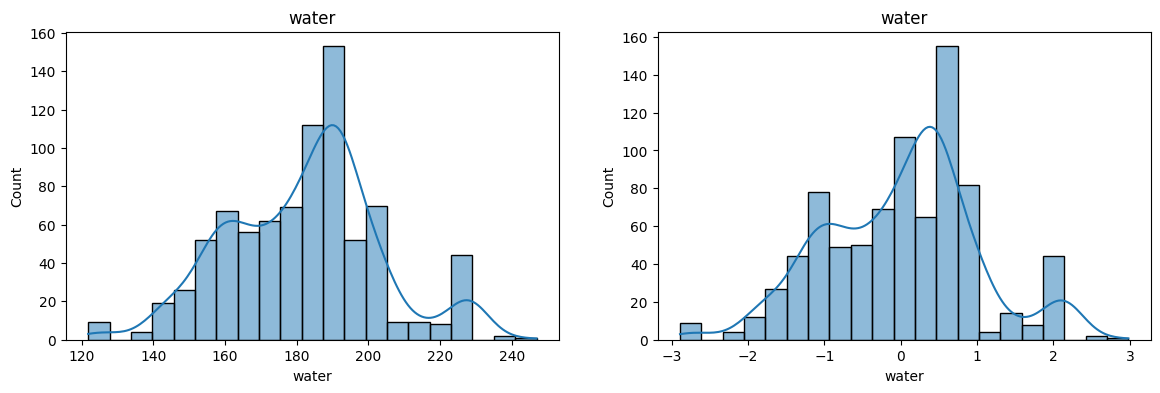

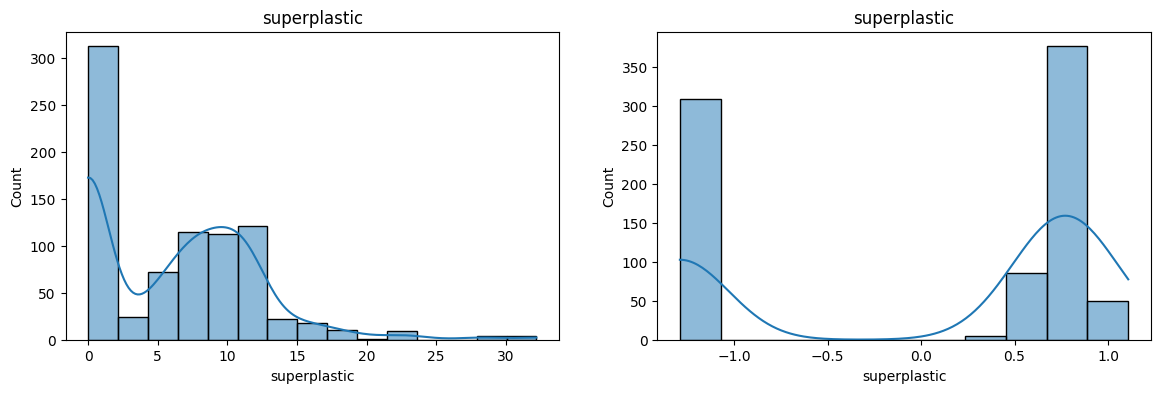

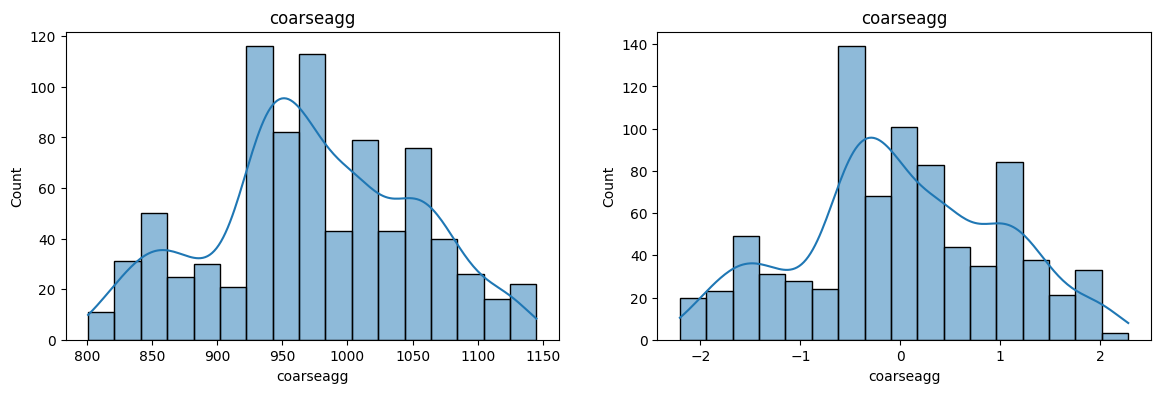

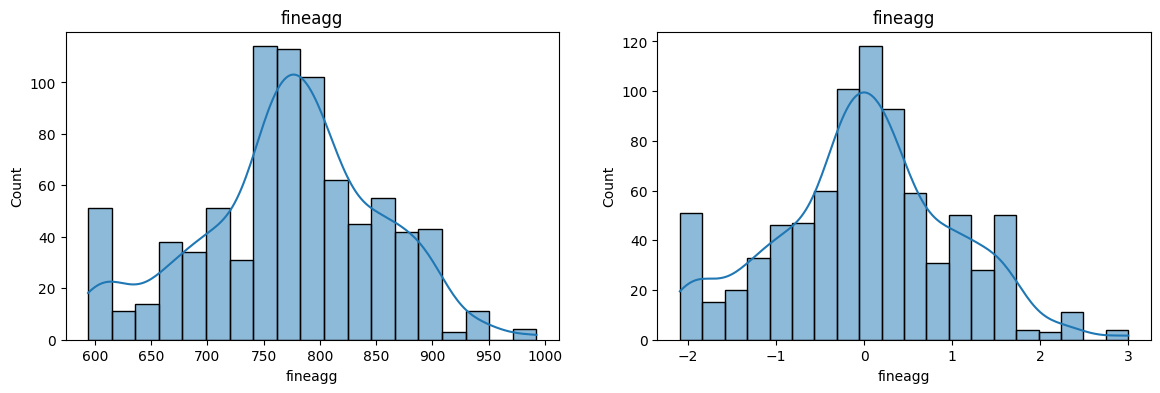

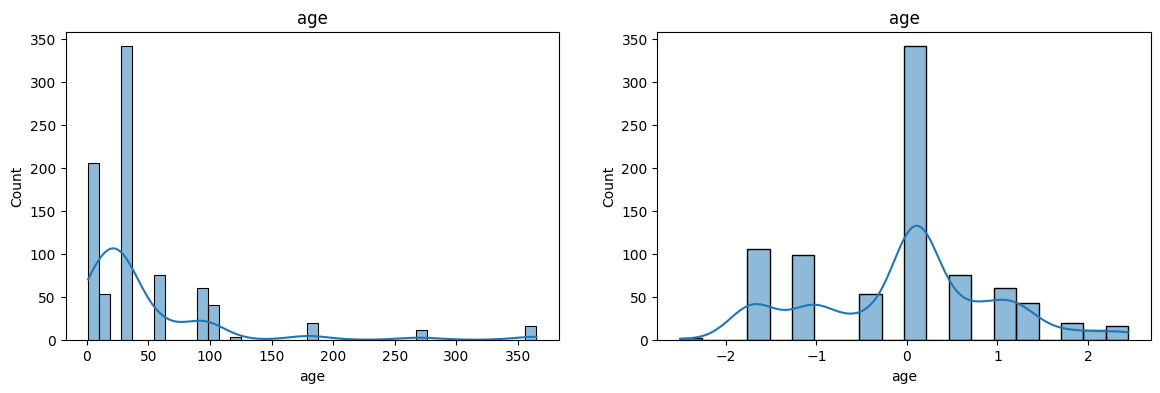

In [80]:
for col in x_train_trans.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  sns.histplot(x_train[col], kde=True)
  plt.title(col)

  plt.subplot(122)
  sns.histplot(x_train_trans[col], kde=True)
  plt.title(col)
  plt.show()


In [81]:
#applying Box-Cox Transform

pt = PowerTransformer()
x_train_trans = pt.fit_transform(x_train)
x_test_trans = pt.transform(x_test)

pd.DataFrame({'cols':x_train.columns, 'Box-Cox_lamda':pt.lambdas_})

,cols,Box-Cox_lamda
0,cement,0.174823
1,slag,0.018590
2,ash,-0.156230
3,water,0.852831
4,superplastic,0.257780
5,coarseagg,1.229730
6,fineagg,1.725780
7,age,0.002863


In [83]:
lr = LinearRegression()
cross_val_score(lr,x_train_trans,y_train,cv = 5, scoring = 'r2').mean()

np.float64(0.80269998113355)

In [82]:
cross_val_score(rf,x_train_trans,y_train,cv = 5, scoring = 'r2').mean()

np.float64(0.8942701083452039)

# Encoding numerical **features**

In [84]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.preprocessing import KBinsDiscretizer

In [85]:
df = pd.read_csv('/content/Titanic-Dataset.csv', usecols=['Age', 'Fare', 'Survived'])

In [86]:
df.shape

(891, 3)

In [88]:
df.dropna(inplace=True)

In [89]:
df.shape

(714, 3)

In [90]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [103]:
x = df.iloc[: , 1:3]
y = df.iloc[: , 0]

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [105]:
clf = DecisionTreeClassifier()

In [106]:
y_train

,Survived
328,1
73,0
253,0
719,0
666,0
...,...
92,0
134,0
337,1
548,0


In [120]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [108]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [109]:
cross_val_score(clf,x,y,cv = 5, scoring = 'accuracy').mean()

np.float64(0.6288486161725599)

In [115]:
kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')

In [116]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [117]:
x_train_trans = trf.fit_transform(x_train)
x_test_trans = trf.transform(x_test)

In [118]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trans,y_train)
y_pred2 = clf.predict(x_test_trans)

In [119]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

# Custom Binning

In [121]:
df = pd.read_csv('/content/Titanic-Dataset.csv', usecols=['Age', 'Fare', 'Survived','SibSp',	'Parch'])

In [122]:
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [123]:
df['family'] = df['SibSp']+df['Parch']

In [124]:
df.head()

,Survived,Age,SibSp,Parch,Fare,family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0


In [125]:
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)

In [129]:
df.head(15)

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0
6,0,54.0,51.8625,0
7,0,2.0,21.0750,4
8,1,27.0,11.1333,2
9,1,14.0,30.0708,1
10,1,4.0,16.7000,2


In [130]:
df.dropna(inplace=True)

In [131]:
df.shape

(714, 4)

In [132]:
x = df.iloc[: , 1:4]
y = df.iloc[: , 0]

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [134]:
from sklearn.preprocessing import Binarizer

In [142]:
trf = ColumnTransformer([
    ('bin', Binarizer(copy=False),[2])
],remainder='passthrough')

In [141]:
x_train_trans = trf.fit_transform(x_train)
x_test_trans = trf.transform(x_test)

In [143]:
pd.DataFrame(x_train_trans,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [144]:
clf = DecisionTreeClassifier()